In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [56]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

In [57]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [5]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [58]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.703


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [60]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.793
Accuracy on test set: 0.730


In [7]:
y_pred = dt.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[149  18]
 [ 44  45]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       167
           1       0.71      0.51      0.59        89

    accuracy                           0.76       256
   macro avg       0.74      0.70      0.71       256
weighted avg       0.75      0.76      0.75       256



In [62]:
#DT visualizatin method 1

from sklearn.tree import export_graphviz

dotfile = open("dt2.dot", 'w')

export_graphviz(dt, out_file=dotfile,feature_names = X.columns,class_names=['0','1'])
dotfile.close()
# Copying the contents of the created file ('dt2.dot' ) to a graphviz rendering agent at http://webgraphviz.com/
# check out https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

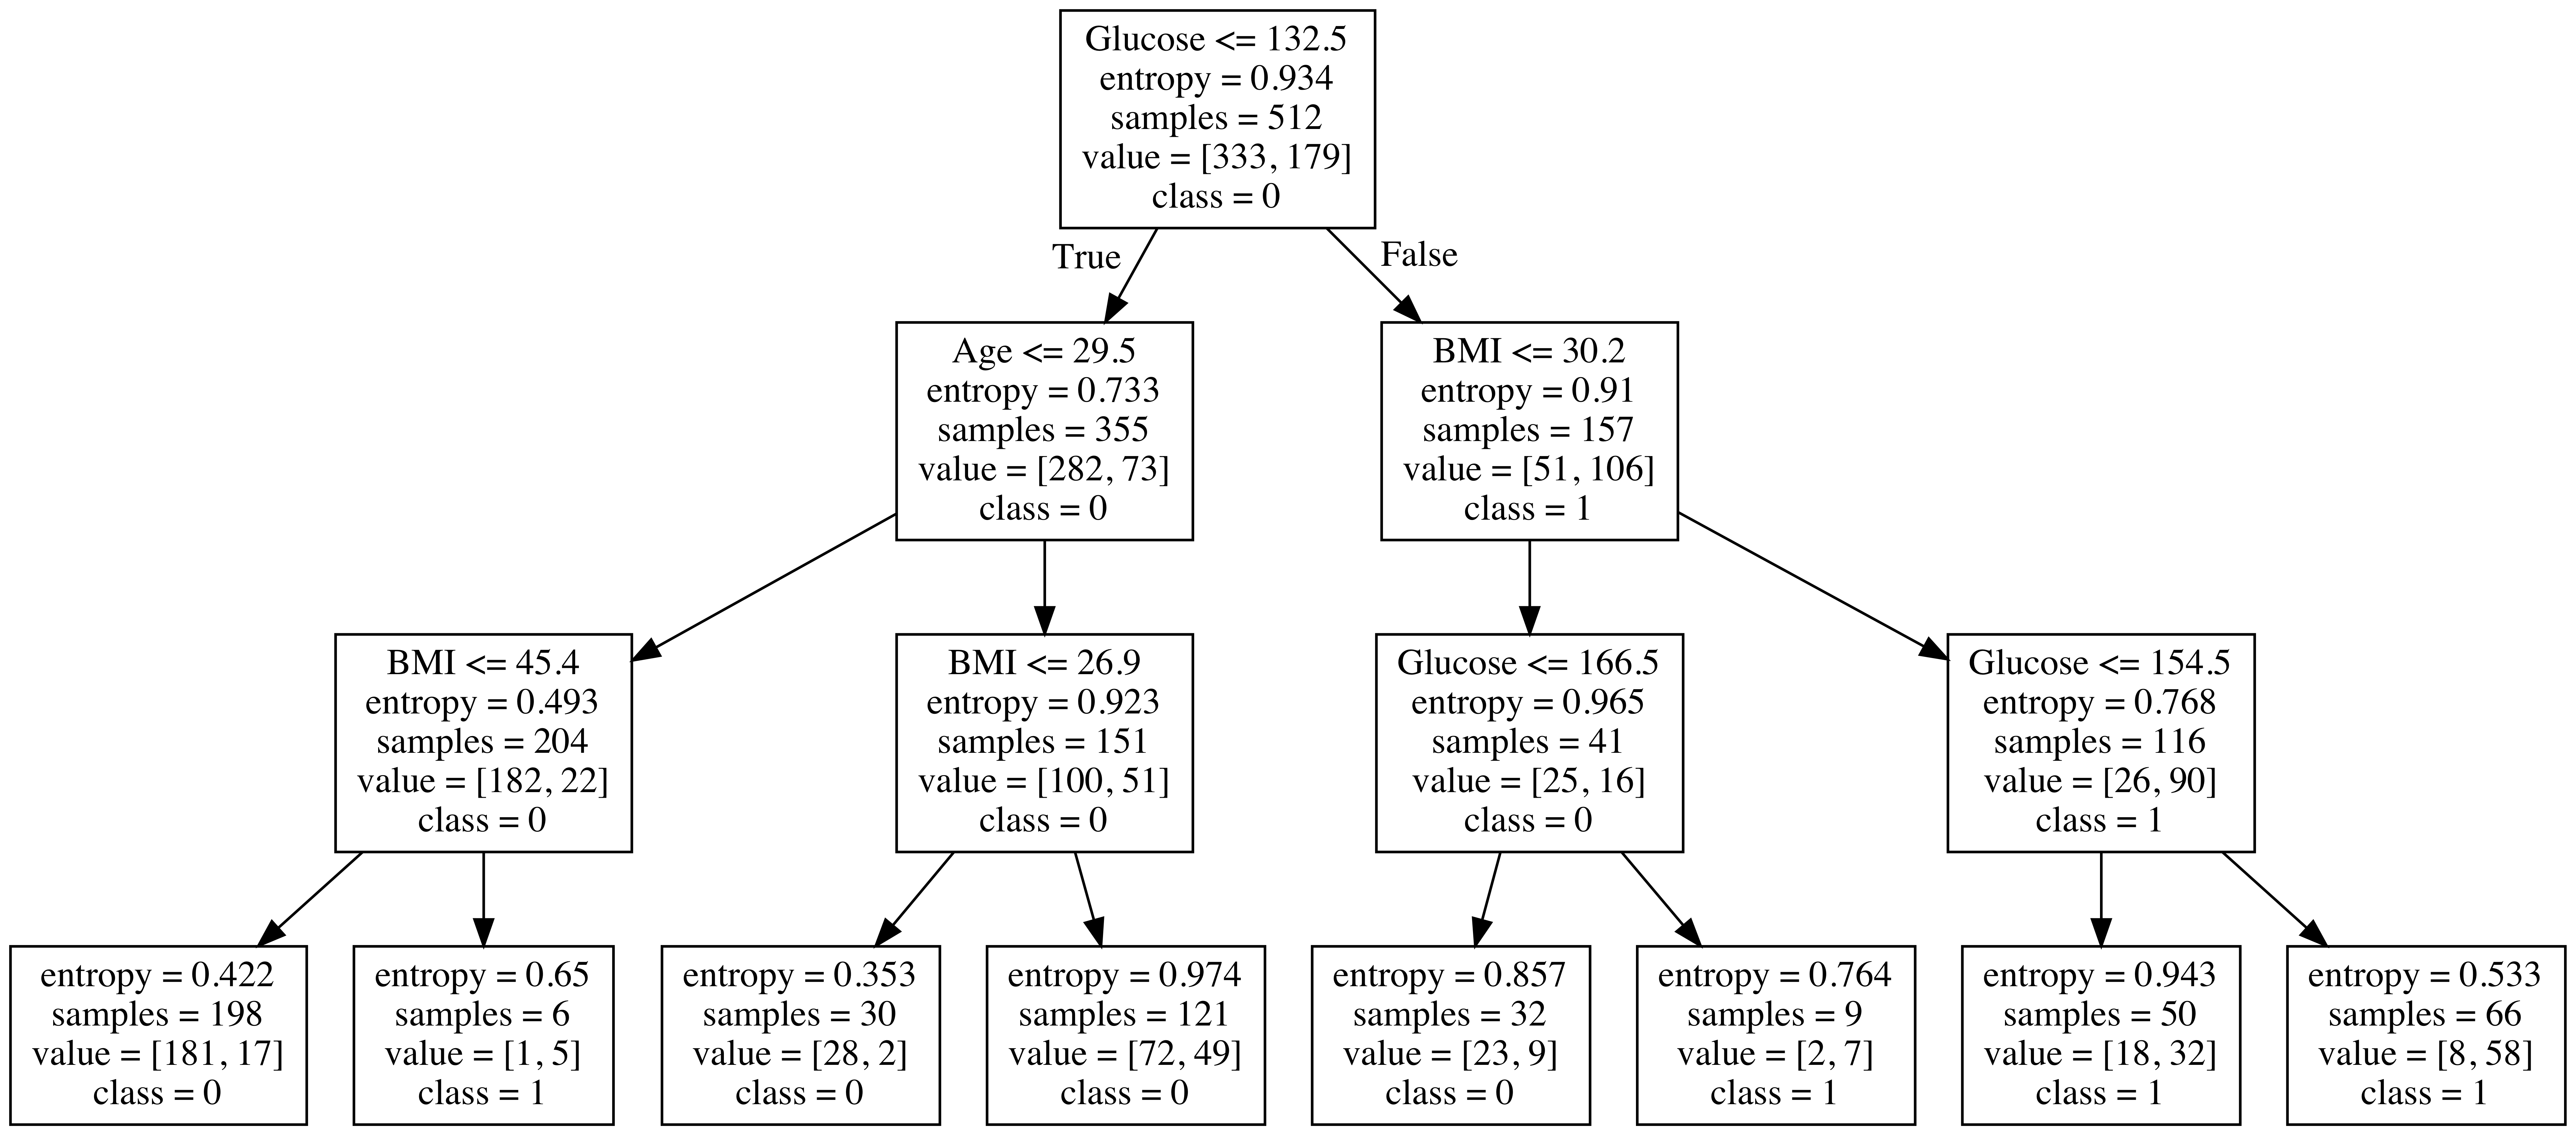

In [63]:
#DT visualizatin method 2
# need to install Graphviz first https://graphviz.gitlab.io/_pages/Download/Download_windows.html

#!conda install python-graphviz
from sklearn.tree import export_graphviz
import os
import graphviz


export_graphviz(dt, out_file='tree.dot', feature_names=X.columns,class_names=['0','1'])
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


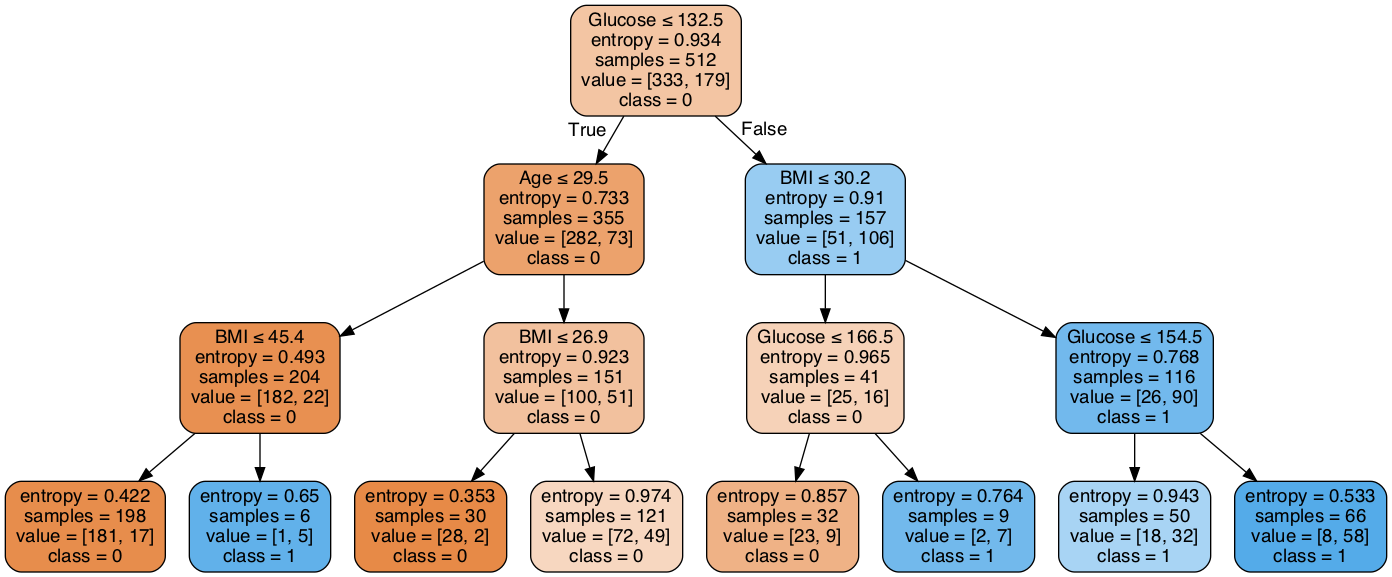

In [64]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [65]:
#Plot ROC chart for DT.Write your code below.

Accuracy= 0.7578125


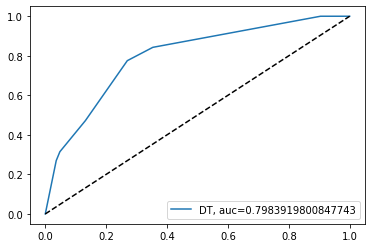

In [66]:
from sklearn import metrics
print("Accuracy=", metrics.accuracy_score(y_test, y_pred))
 
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="DT, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

In [67]:
#Adjust the decision tree parameters to improve the performance.Write your code below.
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf =3, min_samples_split=3, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))


Accuracy on training set: 0.818
Accuracy on test set: 0.758


In [68]:
y_pred = dt.predict(X_test)

In [69]:
#find out the feature importance from the decision tree built above. Write your code below.
export_graphviz(dt, out_file='tree.dot', feature_names=X.columns,class_names=['0','1'])
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# NN

In [70]:

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [ ]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

In [72]:
predictions = mlp.predict(X_test)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.71875
[[132  35]
 [ 37  52]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       167
           1       0.60      0.58      0.59        89

    accuracy                           0.72       256
   macro avg       0.69      0.69      0.69       256
weighted avg       0.72      0.72      0.72       256



In [73]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.848
Accuracy on test set: 0.719


In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

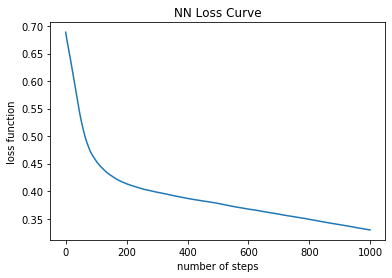

In [75]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [76]:
#check out weights

In [77]:
(mlp.intercepts_[0]).shape

(10,)

In [78]:
(mlp.coefs_[0]).shape

(8, 10)

In [79]:
mlp.intercepts_[0]

array([ 0.24379165,  0.73193231, -0.02905956,  0.47415197,  0.09600746,
       -0.36959105,  0.04752218, -0.48594293, -0.51751515, -0.52982583])

In [80]:
mlp.coefs_[0]

array([[ 0.2392872 , -0.1607203 , -1.02894115,  0.47143577,  0.57050419,
        -0.89708913,  0.13061712,  0.35575447,  0.76346721,  0.2200596 ],
       [-1.33040079, -0.45033727, -0.69152651,  0.95795582, -0.49963237,
         0.03607981, -0.1809178 ,  0.59761334, -0.41801673, -0.57597319],
       [-0.26778826,  0.15971893, -0.14674363,  0.15377185,  0.84566856,
        -0.51035792, -0.5182491 , -0.48642322,  0.39566255, -0.57469523],
       [-0.30342526,  0.17349697, -0.39523982, -0.02175861,  0.27239952,
         0.50142332, -0.52432616, -0.53639375,  0.62829663, -0.24828827],
       [ 0.11304849,  0.20270551,  0.39483538, -0.12609674,  0.65335858,
         0.73419573, -0.26863395, -0.74310476,  0.37832378, -0.67389167],
       [-0.72037788, -0.2314922 ,  0.23447752,  0.94549039, -0.26357241,
        -1.04793168, -0.11587218, -0.63599247,  0.33925825,  0.15490265],
       [-0.40915751, -0.16977052, -0.26724539,  0.26256679,  0.80407896,
         0.16975254, -0.75276925, -0.74656756

In [ ]:

#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(20,20, 20), max_iter=1200,verbose=2)  
mlp.fit(X_train, y_train) 
predictions = mlp.predict(X_test)  

In [82]:
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.70703125
[[128  39]
 [ 36  53]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       167
           1       0.58      0.60      0.59        89

    accuracy                           0.71       256
   macro avg       0.68      0.68      0.68       256
weighted avg       0.71      0.71      0.71       256



# SVM

In [83]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 1
C1, C2 = 1, 10
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

svm_clfs = []
for gamma, C in hyperparams:
    svm_clf=SVC(kernel="rbf",gamma=gamma, C=C) 
    svm_clf.fit(X_train,y_train)
    svm_clfs.append(svm_clf)

from sklearn.metrics import classification_report, confusion_matrix  
for i, svm_clf in enumerate(svm_clfs):
    predictions = svm_clf.predict(X_test)  
    gamma, C = hyperparams[i]
    print("r=", gamma, "C=", C)
    print("Accuracy=", metrics.accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  


r= 0.1 C= 1
Accuracy= 0.75390625
[[143  24]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       167
           1       0.68      0.56      0.61        89

    accuracy                           0.75       256
   macro avg       0.73      0.71      0.72       256
weighted avg       0.75      0.75      0.75       256

r= 0.1 C= 10
Accuracy= 0.7109375
[[134  33]
 [ 41  48]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       167
           1       0.59      0.54      0.56        89

    accuracy                           0.71       256
   macro avg       0.68      0.67      0.67       256
weighted avg       0.71      0.71      0.71       256

r= 1 C= 1
Accuracy= 0.70703125
[[150  17]
 [ 58  31]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       167
           1       0.65      0.35      0.45        89

    accuracy    

# deployment 

In [84]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(mlp, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

pred = loaded_model.predict(X_test)
print(pred)


[0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1
 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0]


In [85]:
#score the model on a scoring data set

diabetes_score_data = pd.read_csv('diabetes-score.csv')
X = diabetes_score_data.drop("Outcome",axis = 1)


In [86]:
sc_X = StandardScaler()

X =  sc_X.fit_transform(X)


pred = loaded_model.predict(X)
print(pred)

[1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0
 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1
 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0
 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1
 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 

# Additional code for your reference: 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html